# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### 1.2. Проектируем архитектуру для этой задачи

In [45]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_n = mms.fit_transform(X_train)
X_test_n = mms.transform(X_test)

model = Sequential([
    Dense(16, input_shape=(13,), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                224       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [52]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [53]:
H = model.fit(X_train_n, y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 3ms/step - loss: 29.7730 - mae: 3.8801
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 23.3973 - mae: 3.3977
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 39.6433 - mae: 4.6133
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 25.3042 - mae: 3.5879
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 26.4387 - mae: 3.7068
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 147.6592 - mae: 8.8321
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 23.6698 - mae: 3.3264
Epoch 8/10
12/12 [==============================] - 0s 4ms/step - loss: 20.8022 - mae: 3.1396
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 21.4897 - mae: 3.2011
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 18.6313 - mae: 2.8845


#### 1.6. Делаем предсказания на тестовых данных

In [49]:
preds = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [61]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(preds, y_test)
print(error)

1369.9505557813143


#### 1.8. Строим график обучения

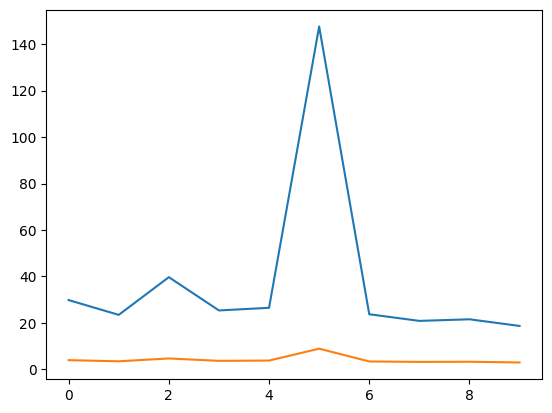

In [63]:
import matplotlib.pyplot as plt

N = np.arange(0, 10)
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["mae"], label="train_loss")

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
# Ваш код

#### 2. Проверка обученной модели пользовательскими данными

In [ ]:
# Ваш код

## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
# Ваш код

### 3. Указываем путь к набору данных:

In [ ]:
# Ваш код

### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
# Ваш код

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
# Ваш код

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
# Ваш код

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
# Ваш код

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# Ваш код

#### 5.3. Компилируем модель:

In [ ]:
# Ваш код

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
# Ваш код

#### 6.2. Запустим процесс обучения модели:

In [ ]:
# Ваш код

#### 6.3. Загружаем лучшую модель:

In [ ]:
# Ваш код

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
# Ваш код

#### 7.2. Выведем матрицу ошибок

In [ ]:
# Ваш код

#### 7.3. Отобразим график обучения

In [ ]:
# Ваш код

### 8. Сохранение модели и меток классов:

In [ ]:
# Ваш код

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
# Ваш код

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
# Ваш код

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
# Ваш код

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Ваш код